In [117]:
import numpy as np
import matplotlib.pyplot as plt
from loadMnist import loadMnist


In [89]:
# Load training and test data
trainingImages, trainingLabels = loadMnist('training')
testImages, testLabels = loadMnist('testing')

print(np.unique(trainingLabels))

[0 1 2 3 4 5 6 7 8 9]


In [91]:
# Keep a subset of the training (60,000 images) and test (10,000) data
trainingImages = trainingImages[:,:]
trainingLabels = trainingLabels[:]

# Test for only a subset of the dataset (e.g., 20 images) to keep the running time relatively low
testImages = testImages[:20,:]
testLabels = testLabels[:20]

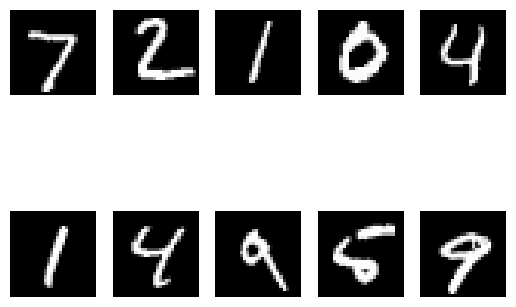

In [92]:
# Show the first ten digits
fig = plt.figure('First 10 Digits') 
for i in range(10):
    a = fig.add_subplot(2,5,i+1) 
    plt.imshow(testImages[i,:].reshape(28,28), cmap=plt.cm.gray)
    plt.axis('off')

plt.show()

In [93]:
def kNN(k,train_image,train_label,test):
    dist=[]
    for i in range(train_image.shape[0]):
        dist.append(np.linalg.norm(test-train_image[i]))
    index=np.array(dist).argsort()[:k]
    label=train_label[index]
    unique,counts=np.unique(label,return_counts=True)
    index_count=unique.argmax()
    return unique[index_count]
    

In [116]:
# Run kNN algorithm
k = 2
predictedDigits = np.zeros(testImages.shape[0])

for i in range(testImages.shape[0]):
    print("Current Test Instance: " + str(i+1))
    predictedDigits[i] = kNN(k, trainingImages, trainingLabels, testImages[i,:])
    
# Calculate accuracy
correct = 0

for i in range(testImages.shape[0]):
    if predictedDigits[i] == testLabels[i]:
        correct += 1
        
accuracy = correct/float(testImages.shape[0])
print("Accuracy: " + str(accuracy))

Current Test Instance: 1
Current Test Instance: 2
Current Test Instance: 3
Current Test Instance: 4
Current Test Instance: 5
Current Test Instance: 6
Current Test Instance: 7
Current Test Instance: 8
Current Test Instance: 9
Current Test Instance: 10
Current Test Instance: 11
Current Test Instance: 12
Current Test Instance: 13
Current Test Instance: 14
Current Test Instance: 15
Current Test Instance: 16
Current Test Instance: 17
Current Test Instance: 18
Current Test Instance: 19
Current Test Instance: 20
Accuracy: 1.0


In [107]:
def kNN_acc(k):
    accuracy=[]
    for j in k:
        print(j)
        predictedDigits = np.zeros(testImages.shape[0])
        for i in range(testImages.shape[0]):
            print("Current Test Instance: " + str(i+1))
            print(i)
            predictedDigits[i] = kNN(j, trainingImages, trainingLabels, testImages[i,:])
            
        # Calculate accuracy
        correct = 0

        for i in range(testImages.shape[0]):
            if predictedDigits[i] == testLabels[i]:
                correct += 1
                
        accuracy_temp = correct/float(testImages.shape[0])
        print("Accuracy: " + str(accuracy_temp))
        accuracy.append(accuracy_temp)
    return accuracy
    

In [97]:
k=[i for i in range(2,11,1)]

In [108]:
accuracy=kNN_acc(k)

2
Current Test Instance: 1
0
Current Test Instance: 2
1
Current Test Instance: 3
2
Current Test Instance: 4
3
Current Test Instance: 5
4
Current Test Instance: 6
5
Current Test Instance: 7
6
Current Test Instance: 8
7
Current Test Instance: 9
8
Current Test Instance: 10
9
Current Test Instance: 11
10
Current Test Instance: 12
11
Current Test Instance: 13
12
Current Test Instance: 14
13
Current Test Instance: 15
14
Current Test Instance: 16
15
Current Test Instance: 17
16
Current Test Instance: 18
17
Current Test Instance: 19
18
Current Test Instance: 20
19
Accuracy: 1.0
3
Current Test Instance: 1
0
Current Test Instance: 2
1
Current Test Instance: 3
2
Current Test Instance: 4
3
Current Test Instance: 5
4
Current Test Instance: 6
5
Current Test Instance: 7
6
Current Test Instance: 8
7
Current Test Instance: 9
8
Current Test Instance: 10
9
Current Test Instance: 11
10
Current Test Instance: 12
11
Current Test Instance: 13
12
Current Test Instance: 14
13
Current Test Instance: 15
14
Curre

In [109]:
accuracy

[1.0, 1.0, 1.0, 1.0, 0.95, 0.9, 0.9, 0.9, 0.9]

In [110]:
import pandas as pd

In [112]:
accuracy_plot=pd.Series(accuracy,index=k)

In [113]:
import matplotlib.pyplot as plt

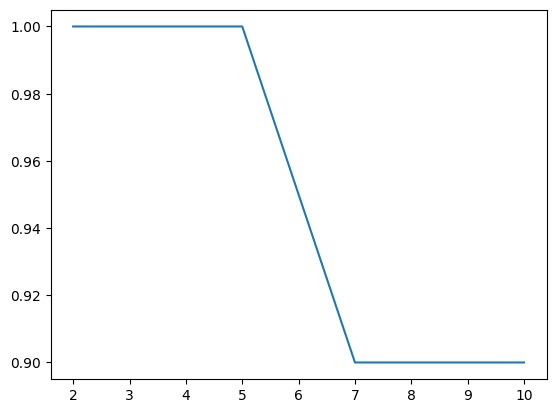

In [115]:
plt.plot(accuracy_plot.index,accuracy_plot)

In [118]:
def kNN_temp(k, X, labels, y):
    # Assigns to the test instance the label of the majority of the labels of the k closest 
    # training examples using the kNN with euclidean distance.

    m = X.shape[0] # number of training examples
    n = X.shape[1] # number of attributes

    # distance from the point y to each element of the training set. 
    # Check that its size equals the number of training points
    distances = np.linalg.norm(X - y, axis=1)
    

    # Sort distances and re-arrange labels based on the distance of the instances
    idx = distances.argsort()
    labels = labels[idx]

    # retrieve the index of the k closest points :
    c = np.zeros(max(labels)+1)
	
    # Compute the class labels of the k nearest neigbors
    for i in range(k):
        c[labels[i]] += 1

    # Return the label with the largest number of appearances
    # rk, if you chose a too small K, it can happen that there is a tie between some classes. 
    # In this case np will select the first label of the tie
    label = np.argmax(c)
    
    return label

In [119]:
# Run kNN algorithm
k = 2
predictedDigits = np.zeros(testImages.shape[0])

for i in range(testImages.shape[0]):
    print("Current Test Instance: " + str(i+1))
    predictedDigits[i] = kNN_temp(k, trainingImages, trainingLabels, testImages[i,:])
    
# Calculate accuracy
correct = 0

for i in range(testImages.shape[0]):
    if predictedDigits[i] == testLabels[i]:
        correct += 1
        
accuracy = correct/float(testImages.shape[0])
print("Accuracy: " + str(accuracy))

Current Test Instance: 1
Current Test Instance: 2
Current Test Instance: 3
Current Test Instance: 4
Current Test Instance: 5
Current Test Instance: 6
Current Test Instance: 7
Current Test Instance: 8
Current Test Instance: 9
Current Test Instance: 10
Current Test Instance: 11
Current Test Instance: 12
Current Test Instance: 13
Current Test Instance: 14
Current Test Instance: 15
Current Test Instance: 16
Current Test Instance: 17
Current Test Instance: 18
Current Test Instance: 19
Current Test Instance: 20
Accuracy: 1.0
